# Divvy Ridership 2018
## By Alejandra Rosa, Brianna John & Jordan Evans

<img src="Images/logo.png" width="50%" height="50%">

In [89]:
# Dependencies
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import gmaps
from api_keys import weather_api_key
from api_keys import g_key
import calendar
import datetime

%matplotlib inline

In [3]:
# File to Load
q1_2018_csv = "Resources/Divvy_Trips_2018_Q1.csv"
q2_2018_csv = "Resources/Divvy_Trips_2018_Q2.csv"
q3_2018_csv = "Resources/Divvy_Trips_2018_Q3.csv"
q4_2018_csv = "Resources/Divvy_Trips_2018_Q4.csv"

# Read School and Student Data File and store into Pandas Data Frames
q1_data = pd.read_csv(q1_2018_csv)
q2_data = pd.read_csv(q2_2018_csv)
q3_data = pd.read_csv(q3_2018_csv)
q4_data = pd.read_csv(q4_2018_csv)

In [15]:
q1_data

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...
387140,18000522,2018-03-31 23:46:00,2018-04-01 00:05:00,1935,"1,130.00",158,Milwaukee Ave & Wabansia Ave,260,Kedzie Ave & Milwaukee Ave,Subscriber,Male,1982.0
387141,18000523,2018-03-31 23:47:00,2018-03-31 23:52:00,5852,262,299,Halsted St & Roscoe St,229,Southport Ave & Roscoe St,Subscriber,Male,1989.0
387142,18000524,2018-03-31 23:50:00,2018-03-31 23:57:00,4414,440,327,Sheffield Ave & Webster Ave,226,Racine Ave & Belmont Ave,Subscriber,Male,1991.0
387143,18000525,2018-03-31 23:52:00,2018-04-01 00:07:00,6448,887,265,Cottage Grove Ave & Oakwood Blvd,426,Ellis Ave & 60th St,Subscriber,Male,1991.0


In [16]:
q2_data

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,18000527,2018-04-01 00:04:44,2018-04-01 00:13:03,3819,499.0,22,May St & Taylor St,171,May St & Cullerton St,Subscriber,Male,1994.0
1,18000528,2018-04-01 00:06:42,2018-04-01 00:27:07,5000,"1,225.0",157,Lake Shore Dr & Wellington Ave,190,Southport Ave & Wrightwood Ave,Subscriber,Male,1965.0
2,18000529,2018-04-01 00:07:19,2018-04-01 00:23:19,5165,960.0,106,State St & Pearson St,106,State St & Pearson St,Customer,NaN,NaN
3,18000530,2018-04-01 00:07:33,2018-04-01 00:14:47,3851,434.0,241,Morgan St & Polk St,171,May St & Cullerton St,Subscriber,Male,1998.0
4,18000531,2018-04-01 00:10:23,2018-04-01 00:22:12,5065,709.0,228,Damen Ave & Melrose Ave,219,Damen Ave & Cortland St,Subscriber,Male,1983.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1059676,19244618,2018-06-30 23:59:27,2018-07-01 00:06:33,338,426.0,141,Clark St & Lincoln Ave,313,Lakeview Ave & Fullerton Pkwy,Customer,NaN,NaN
1059677,19244619,2018-06-30 23:59:48,2018-07-01 00:08:45,3646,537.0,260,Kedzie Ave & Milwaukee Ave,506,Spaulding Ave & Armitage Ave,Subscriber,Male,1980.0
1059678,19244620,2018-06-30 23:59:56,2018-07-01 00:17:14,4360,"1,038.0",38,Clark St & Lake St,338,Calumet Ave & 18th St,Subscriber,Female,1985.0
1059679,19244621,2018-06-30 23:59:55,2018-07-01 00:38:10,401,"2,295.0",284,Michigan Ave & Jackson Blvd,340,Clark St & Wrightwood Ave,Subscriber,Male,1989.0


In [17]:
q1_data.dtypes

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
dtype: object

In [18]:
q1_data['start_time'] = pd.to_datetime(q1_data['start_time'])
q1_data['end_time'] = pd.to_datetime(q1_data['end_time'])

In [19]:
q1_data

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...
387140,18000522,2018-03-31 23:46:00,2018-04-01 00:05:00,1935,"1,130.00",158,Milwaukee Ave & Wabansia Ave,260,Kedzie Ave & Milwaukee Ave,Subscriber,Male,1982.0
387141,18000523,2018-03-31 23:47:00,2018-03-31 23:52:00,5852,262,299,Halsted St & Roscoe St,229,Southport Ave & Roscoe St,Subscriber,Male,1989.0
387142,18000524,2018-03-31 23:50:00,2018-03-31 23:57:00,4414,440,327,Sheffield Ave & Webster Ave,226,Racine Ave & Belmont Ave,Subscriber,Male,1991.0
387143,18000525,2018-03-31 23:52:00,2018-04-01 00:07:00,6448,887,265,Cottage Grove Ave & Oakwood Blvd,426,Ellis Ave & 60th St,Subscriber,Male,1991.0


In [20]:
#q1_data.start_time.dt.strftime('%m')
q1_data.dtypes
q1_data.start_time.dt.strftime('%m-%y')
q1_data.end_time.dt.strftime('%m-%y')

0         01-18
1         01-18
2         01-18
3         01-18
4         01-18
          ...  
387140    04-18
387141    03-18
387142    03-18
387143    04-18
387144    04-18
Name: end_time, Length: 387145, dtype: object

In [21]:
#concatenate all quarters into one dataframe
divvy_data = [q1_data, q2_data, q3_data, q4_data]

divvy_combined = pd.concat(divvy_data)

divvy_combined

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...
642681,21742438,2018-12-31 23:45:17,2018-12-31 23:50:05,2931,288.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Female,1983.0
642682,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0
642683,21742440,2018-12-31 23:50:09,2018-12-31 23:57:16,4927,427.0,41,Federal St & Polk St,52,Michigan Ave & Lake St,Subscriber,Female,1995.0
642684,21742441,2018-12-31 23:55:04,2018-12-31 23:58:24,1350,200.0,141,Clark St & Lincoln Ave,118,Sedgwick St & North Ave,Subscriber,Male,1999.0


# Question 1- When are the the most Divvy bikes on the road?

## Average rides over 2018:

   ## By understanding the most common times and routes that divvy operates, the city can decide where to add new bike lanes.
   
<img src="Images/Divvy_1.jpg" width="50%" height="50%">

In [22]:
#divvy_ride = divvy_combined.set_index('start_time')
divvy_ride = divvy_combined
divvy_ride

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...
642681,21742438,2018-12-31 23:45:17,2018-12-31 23:50:05,2931,288.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Female,1983.0
642682,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0
642683,21742440,2018-12-31 23:50:09,2018-12-31 23:57:16,4927,427.0,41,Federal St & Polk St,52,Michigan Ave & Lake St,Subscriber,Female,1995.0
642684,21742441,2018-12-31 23:55:04,2018-12-31 23:58:24,1350,200.0,141,Clark St & Lincoln Ave,118,Sedgwick St & North Ave,Subscriber,Male,1999.0


In [23]:
divvy_ride['start_time'] = pd.to_datetime(divvy_combined['start_time'])
divvy_ride['end_time'] = pd.to_datetime(divvy_combined['end_time'])

In [24]:
divvy_ride

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...
642681,21742438,2018-12-31 23:45:17,2018-12-31 23:50:05,2931,288.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Female,1983.0
642682,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0
642683,21742440,2018-12-31 23:50:09,2018-12-31 23:57:16,4927,427.0,41,Federal St & Polk St,52,Michigan Ave & Lake St,Subscriber,Female,1995.0
642684,21742441,2018-12-31 23:55:04,2018-12-31 23:58:24,1350,200.0,141,Clark St & Lincoln Ave,118,Sedgwick St & North Ave,Subscriber,Male,1999.0


In [25]:
divvy_ride['hour'] = divvy_combined['start_time'].dt.hour
divvy_hour = divvy_ride.groupby('hour').count()
divvy_hour.head(5)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
hour,,,,,,,,,,,,
0,22490,22490,22490,22490,22490,22490,22490,22490,22490,22490,17433,17489
1,13391,13391,13391,13391,13391,13391,13391,13391,13391,13391,10170,10195
2,8229,8229,8229,8229,8229,8229,8229,8229,8229,8229,6203,6224
3,5318,5318,5318,5318,5318,5318,5318,5318,5318,5318,4109,4118
4,6701,6701,6701,6701,6701,6701,6701,6701,6701,6701,5972,5990


<function matplotlib.pyplot.show(*args, **kw)>

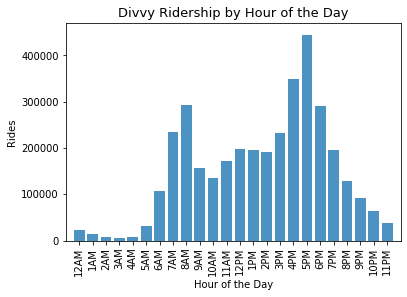

In [74]:
#df['time_hour'] = df['timestamp'].dt.hour
#divvy_ride['hour'] = pd.DatetimeIndex['divvy_combined'].hour
#Resources: https://stackoverflow.com/questions/25129144/pandas-return-hour-from-datetime-column-directly

#Bar graph visualization by hour

fig, ax1 = plt.subplots()

plot_hours= ['12AM', '1AM', '2AM', '3AM','4AM','5AM','6AM','7AM','8AM','9AM','10AM','11AM','12PM','1PM','2PM','3PM','4PM','5PM','6PM','7PM','8PM','9PM','10PM','11PM']

plt.bar(plot_hours, divvy_hour['trip_id'],alpha=.8)
plt.title("Divvy Ridership by Hour of the Day", fontsize=13)
plt.xlabel("Hour of the Day")
plt.ylabel("Rides")
plt.xticks(plot_hours, rotation='vertical')
plt.xlim(-1,24)
plt.ylim(0,470000)

fig.savefig('hour_plot.png', dpi=fig.dpi)

plt.show


<img src="hour_plot.png" width="50%" height="50%">


In [32]:
divvy_day=divvy_combined
divvy_day['start_time'] = pd.to_datetime(divvy_combined['start_time'])
divvy_day['end_time'] = pd.to_datetime(divvy_combined['end_time'])
divvy_day['day_of_week']=divvy_combined['start_time'].dt.weekday_name

In [33]:
divvy_weekday = divvy_day.groupby('day_of_week').count()
divvy_weekday.head(7)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,hour
day_of_week,,,,,,,,,,,,,
Friday,525681,525681,525681,525681,525681,525681,525681,525681,525681,525681,456816,457969,525681
Monday,528569,528569,528569,528569,528569,528569,528569,528569,528569,528569,461731,462721,528569
Saturday,445385,445385,445385,445385,445385,445385,445385,445385,445385,445385,311853,312805,445385
Sunday,405892,405892,405892,405892,405892,405892,405892,405892,405892,405892,285419,286220,405892
Thursday,562646,562646,562646,562646,562646,562646,562646,562646,562646,562646,503229,504384,562646
Tuesday,558584,558584,558584,558584,558584,558584,558584,558584,558584,558584,504646,505752,558584
Wednesday,576325,576325,576325,576325,576325,576325,576325,576325,576325,576325,516883,518022,576325


<function matplotlib.pyplot.show(*args, **kw)>

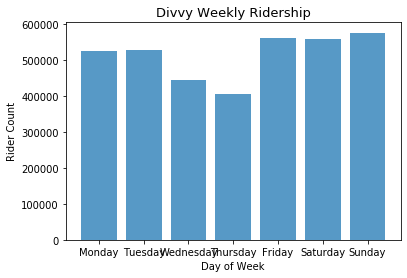

In [75]:
plot_days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.bar(plot_days, divvy_weekday['trip_id'],alpha=0.75)
plt.title("Divvy Weekly Ridership", fontsize=13)
plt.xlabel("Day of Week")
plt.ylabel("Rider Count")
fig.savefig('day_plot.png', dpi=fig.dpi)
plt.show

# Question 2 - What are the most used stops?

## Data from this section will help divvy optimize their bike replenishment routes and ensure that bikes are available where/when needed

<img src="Images/Divvy-bean.jpg" width="50%" height="50%">

In [35]:
stations_csv = "Resources/Divvy_Bicycle_Stations_-_All_-_Map.csv"

In [36]:
stations = pd.read_csv(stations_csv)

In [37]:
stations.rename(columns = {'Station Name':'from_station_name'}, inplace = True)
stations

,ID,from_station_name,Address,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,102,Stony Island Ave & 67th St,NaN,11,11,In Service,41.773459,-87.585340,"(41.77345849948, -87.5853397391)"
1,103,Clinton St & Polk St,NaN,15,15,In Service,41.871467,-87.640949,"(41.87146651779, -87.6409491327)"
2,11,Jeffery Blvd & 71st St,NaN,11,11,In Service,41.766638,-87.576450,"(41.76663823695, -87.5764501141)"
3,12,South Shore Dr & 71st St,NaN,15,15,In Service,41.766409,-87.565688,"(41.7664094567, -87.5656875719)"
4,132,Wentworth Ave & 24th St (Temp),NaN,15,15,In Service,41.850084,-87.632141,"(41.85008369347577, -87.6321405172348)"
...,...,...,...,...,...,...,...,...,...
606,32,Racine Ave & Congress Pkwy,NaN,19,19,In Service,41.874640,-87.657030,"(41.87464, -87.65703)"
607,198,Green St & Madison St,NaN,27,27,In Service,41.881892,-87.648789,"(41.881892, -87.648789)"
608,217,Elizabeth (May) St & Fulton St,NaN,15,15,In Service,41.886616,-87.658040,"(41.886616486027656, -87.6580399274826)"
609,442,California Ave & 23rd Pl,NaN,11,11,In Service,41.849110,-87.695140,"(41.84910969176, -87.6951398068)"


In [41]:
divvy_df = pd.DataFrame(divvy_combined.groupby(["from_station_id"])["to_station_name"].count().reset_index())

In [42]:
divvy_df

,from_station_id,to_station_name
0,2,9062
1,3,23282
2,4,11544
3,5,8156
4,6,13515
...,...,...
616,660,200
617,661,25
618,662,46
619,663,68


In [43]:
divvy_df.rename(columns = {'from_station_id':'ID'}, inplace = True)
divvy_df

,ID,to_station_name
0,2,9062
1,3,23282
2,4,11544
3,5,8156
4,6,13515
...,...,...
616,660,200
617,661,25
618,662,46
619,663,68


In [44]:
divvy_locations = pd.merge(divvy_df, stations, on="ID", how="outer")

divvy_locations

,ID,to_station_name,from_station_name,Address,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,2,9062.0,Buckingham Fountain,NaN,39.0,39.0,In Service,41.876511,-87.620548,"(41.87651122881695, -87.62054800987242)"
1,3,23282.0,Shedd Aquarium,NaN,55.0,55.0,In Service,41.867226,-87.615355,"(41.86722595682, -87.6153553902)"
2,4,11544.0,Burnham Harbor,NaN,23.0,23.0,In Service,41.856268,-87.613348,"(41.856268, -87.613348)"
3,5,8156.0,State St & Harrison St,NaN,23.0,23.0,In Service,41.874053,-87.627716,"(41.874053, -87.627716)"
4,6,13515.0,Dusable Harbor,NaN,39.0,39.0,In Service,41.886976,-87.612813,"(41.886976, -87.612813)"
...,...,...,...,...,...,...,...,...,...,...
624,665,NaN,South Chicago Ave & Elliot Ave,NaN,7.0,7.0,In Service,41.747363,-87.580046,"(41.747363, -87.580046)"
625,666,NaN,Cherry Ave & Blackhawk St,NaN,15.0,15.0,In Service,41.907221,-87.655618,"(41.907221, -87.655618)"
626,652,NaN,Rhodes Ave & 71st St,NaN,11.0,11.0,In Service,41.766000,-87.611726,"(41.766, -87.611726)"
627,642,NaN,Latrobe Ave & Chicago Ave,NaN,7.0,7.0,In Service,41.894745,-87.756895,"(41.894745, -87.756895)"


In [45]:
new_divvy = divvy_locations.drop(columns='Address')
new_divvy

,ID,to_station_name,from_station_name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,2,9062.0,Buckingham Fountain,39.0,39.0,In Service,41.876511,-87.620548,"(41.87651122881695, -87.62054800987242)"
1,3,23282.0,Shedd Aquarium,55.0,55.0,In Service,41.867226,-87.615355,"(41.86722595682, -87.6153553902)"
2,4,11544.0,Burnham Harbor,23.0,23.0,In Service,41.856268,-87.613348,"(41.856268, -87.613348)"
3,5,8156.0,State St & Harrison St,23.0,23.0,In Service,41.874053,-87.627716,"(41.874053, -87.627716)"
4,6,13515.0,Dusable Harbor,39.0,39.0,In Service,41.886976,-87.612813,"(41.886976, -87.612813)"
...,...,...,...,...,...,...,...,...,...
624,665,NaN,South Chicago Ave & Elliot Ave,7.0,7.0,In Service,41.747363,-87.580046,"(41.747363, -87.580046)"
625,666,NaN,Cherry Ave & Blackhawk St,15.0,15.0,In Service,41.907221,-87.655618,"(41.907221, -87.655618)"
626,652,NaN,Rhodes Ave & 71st St,11.0,11.0,In Service,41.766000,-87.611726,"(41.766, -87.611726)"
627,642,NaN,Latrobe Ave & Chicago Ave,7.0,7.0,In Service,41.894745,-87.756895,"(41.894745, -87.756895)"


In [46]:
new_divvy = new_divvy.dropna()
new_divvy

,ID,to_station_name,from_station_name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,2,9062.0,Buckingham Fountain,39.0,39.0,In Service,41.876511,-87.620548,"(41.87651122881695, -87.62054800987242)"
1,3,23282.0,Shedd Aquarium,55.0,55.0,In Service,41.867226,-87.615355,"(41.86722595682, -87.6153553902)"
2,4,11544.0,Burnham Harbor,23.0,23.0,In Service,41.856268,-87.613348,"(41.856268, -87.613348)"
3,5,8156.0,State St & Harrison St,23.0,23.0,In Service,41.874053,-87.627716,"(41.874053, -87.627716)"
4,6,13515.0,Dusable Harbor,39.0,39.0,In Service,41.886976,-87.612813,"(41.886976, -87.612813)"
...,...,...,...,...,...,...,...,...,...
616,660,200.0,Sheridan Rd & Columbia Ave,15.0,15.0,In Service,42.004583,-87.661406,"(42.004583, -87.661406)"
617,661,25.0,Evanston Civic Center,15.0,15.0,In Service,42.057044,-87.686554,"(42.057044, -87.686554)"
618,662,46.0,Dodge Ave & Mulford St,15.0,15.0,In Service,42.023463,-87.699595,"(42.023463, -87.699595)"
619,663,68.0,Lincolnwood Dr & Central St,15.0,15.0,In Service,42.064854,-87.715297,"(42.064854, -87.715297)"


In [54]:
top_divvy_to = new_divvy.sort_values(by=['to_station_name'],ascending=False)
top_divvy_to.head(10)

,ID,to_station_name,from_station_name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
31,35,66944.0,Streeter Dr & Grand Ave,47.0,47.0,In Service,41.892278,-87.612043,"(41.892278, -87.612043)"
173,192,62654.0,Canal St & Adams St,47.0,47.0,In Service,41.879255,-87.639904,"(41.879255, -87.639904)"
69,77,51692.0,Clinton St & Madison St,31.0,31.0,In Service,41.882242,-87.641066,"(41.882242, -87.641066)"
79,91,48669.0,Clinton St & Washington Blvd,31.0,31.0,In Service,41.883380,-87.641170,"(41.88338, -87.64117)"
39,43,38029.0,Michigan Ave & Washington St,43.0,43.0,In Service,41.883984,-87.624684,"(41.8839840647265, -87.6246839761734)"
68,76,36174.0,Lake Shore Dr & Monroe St,39.0,39.0,In Service,41.880958,-87.616743,"(41.880958, -87.616743)"
176,195,35342.0,Columbus Dr & Randolph St,55.0,55.0,In Service,41.884728,-87.619521,"(41.884728, -87.619521)"
119,133,34589.0,Kingsbury St & Kinzie St,31.0,31.0,In Service,41.889177,-87.638506,"(41.88917683258, -87.6385057718)"
157,174,34188.0,Canal St & Madison St,35.0,35.0,In Service,41.882091,-87.639833,"(41.882091, -87.639833)"
71,81,33968.0,Daley Center Plaza,39.0,39.0,In Service,41.884241,-87.629634,"(41.884241, -87.629634)"


In [55]:
top_divvy_to_2 = top_divvy_to.head(10)

In [58]:
#top_divvy_from = new_divvy.sort_values(by=['from_station_name'],ascending=False)
#top_divvy_from.head(10)

In [49]:
gmaps.configure(api_key=g_key)

In [50]:
locations = new_divvy[["Latitude", "Longitude"]].astype(float)

In [51]:
divvy_bikes = new_divvy['to_station_name'].astype(float)

In [52]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=divvy_bikes, 
                                 dissipating=False,max_intensity=15,
                                 point_radius = .0005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [56]:
top_locations = top_divvy_to_2[["Latitude", "Longitude"]].astype(float)
top_divvy_bikes = top_divvy_to_2['to_station_name'].astype(float)

fig = gmaps.figure()

heat_layer_top = gmaps.heatmap_layer(top_locations, weights=top_divvy_bikes, 
                                 dissipating=False, opacity=0.5,max_intensity=15,
                                 point_radius = .0005)

fig.add_layer(heat_layer_top)

fig

Figure(layout=FigureLayout(height='420px'))

In [59]:
#attempt to map top "from divvy"

# Question 3 - How does weather affect rides? 
## Does ridership change month over month as weather changes?

<img src="Images/divvy_winter.jpg" width="30%" height="30%">


In [77]:
#make sure start/end time are dates, not objects
divvy_combined.dtypes

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
hour                          int64
day_of_week                  object
dtype: object

In [78]:
#transform objects to dates
divvy_combined['start_time'] = pd.to_datetime(divvy_combined['start_time'])
divvy_combined['end_time'] = pd.to_datetime(divvy_combined['end_time'])

In [79]:
#check again
divvy_combined.dtypes

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
hour                          int64
day_of_week                  object
dtype: object

In [80]:
#copy dataframe and add a month column using start time
divvy_combined_month = divvy_combined

divvy_combined_month['month'] = divvy_combined['start_time'].dt.month

divvy_combined_month

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,hour,day_of_week,month
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,0,Monday,1
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,0,Monday,1
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,0,Monday,1
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,0,Monday,1
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,0,Monday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642681,21742438,2018-12-31 23:45:17,2018-12-31 23:50:05,2931,288.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Female,1983.0,23,Monday,12
642682,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0,23,Monday,12
642683,21742440,2018-12-31 23:50:09,2018-12-31 23:57:16,4927,427.0,41,Federal St & Polk St,52,Michigan Ave & Lake St,Subscriber,Female,1995.0,23,Monday,12
642684,21742441,2018-12-31 23:55:04,2018-12-31 23:58:24,1350,200.0,141,Clark St & Lincoln Ave,118,Sedgwick St & North Ave,Subscriber,Male,1999.0,23,Monday,12


In [81]:
#divvy_combined_month['month'] = divvy_combined_month['month'].apply(lambda x: calendar.month_abbr[x])

In [82]:
#move month as index
month_count = divvy_combined_month.groupby('month').count()
month_count

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,hour,day_of_week
month,,,,,,,,,,,,,,
1,109706,109706,109706,109706,109706,109706,109706,109706,109706,109706,106201,106211,109706,109706
2,102950,102950,102950,102950,102950,102950,102950,102950,102950,102950,99550,99580,102950,102950
3,174489,174489,174489,174489,174489,174489,174489,174489,174489,174489,158901,159032,174489,174489
4,200112,200112,200112,200112,200112,200112,200112,200112,200112,200112,178186,178381,200112,200112
5,401150,401150,401150,401150,401150,401150,401150,401150,401150,401150,318267,318796,401150,401150
6,458419,458419,458419,458419,458419,458419,458419,458419,458419,458419,366594,367363,458419,458419
7,544703,544703,544703,544703,544703,544703,544703,544703,544703,544703,422675,423948,544703,544703
8,530755,530755,530755,530755,530755,530755,530755,530755,530755,530755,427855,428946,530755,530755
9,438112,438112,438112,438112,438112,438112,438112,438112,438112,438112,368044,369096,438112,438112


In [83]:
#need to bring temperature data - either avg temp by month or high/low temp by month  

#https://www.timeanddate.com/weather/usa/chicago/historic?month=5&year=2018
temp_csv = "Resources/Chicago_temp_2018.csv"

In [84]:
temp = pd.read_csv(temp_csv)
temp

,month,high,low,average
0,1,60,-9,27
1,2,66,-1,31
2,3,58,22,37
3,4,80,21,42
4,5,96,45,66
5,6,94,52,71
6,7,95,62,77
7,8,96,60,77
8,9,95,42,70
9,10,88,28,54


In [85]:
update_temp = temp.set_index('month')
update_temp

,high,low,average
month,,,
1,60,-9,27
2,66,-1,31
3,58,22,37
4,80,21,42
5,96,45,66
6,94,52,71
7,95,62,77
8,96,60,77
9,95,42,70


In [86]:
months_to_plot = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

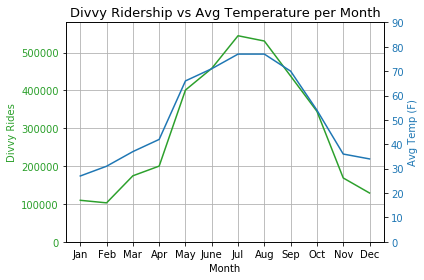

In [88]:
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.plot(months_to_plot, month_count['start_time'], label='Divvy Rides',color=color)
ax1.set_xlabel('Month')
ax1.set_title('Divvy Ridership vs Avg Temperature per Month', fontsize=13)
ax1.grid(True)
ax1.set_ylabel('Divvy Rides',color=color)
ax1.set_ylim(0, 580000)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.plot(temp['average'], label='Avg Temp(F)')
ax2.set_ylabel('Avg Temp (F)',color=color)
ax2.set_ylim(0, 90)
ax2.tick_params(axis='y', labelcolor=color)

fig.savefig('temp_plot.png', dpi=fig.dpi)

fig.tight_layout()
plt.show()

<img src="temp_plot.png" width="50%" height="50%">


# Question 4 - Demographic Data

## This data will help inform Divvy's marketing efforts in new subscriber acquisition

<img src="Images/Divvy_demo.jpg" width="50%" height="50%">

In [90]:
gender_count = divvy_combined_month.groupby('gender').count()
gender_count

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,birthyear,hour,day_of_week,month
gender,,,,,,,,,,,,,,
Female,758736,758736,758736,758736,758736,758736,758736,758736,758736,758736,758708,758736,758736,758736
Male,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281809,2281841,2281841,2281841


In [91]:
gender_count.style.format({"trip_id": "{:,}"}) 

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,birthyear,hour,day_of_week,month
gender,,,,,,,,,,,,,,
Female,"758,736",758736,758736,758736,758736,758736,758736,758736,758736,758736,758708,758736,758736,758736
Male,"2,281,841",2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281809,2281841,2281841,2281841


In [93]:
gender_to_plot = gender_count[gender_count.columns[1:2]] 
gender_to_plot

,start_time
gender,
Female,758736
Male,2281841


In [92]:
labels= ['Female', 'Male']

plt.pie(gender_to_plot,labels=labels, startangle=90, autopct='%.2f%%')
plt.title('Divvy Ridership by Gender')
plt.show()

NameError: name 'gender_to_plot' is not defined

In [96]:
divvy_combined_month

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,hour,month
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,0,1
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,0,1
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,0,1
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,0,1
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642681,21742438,2018-12-31 23:45:17,2018-12-31 23:50:05,2931,288.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Female,1983.0,23,12
642682,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0,23,12
642683,21742440,2018-12-31 23:50:09,2018-12-31 23:57:16,4927,427.0,41,Federal St & Polk St,52,Michigan Ave & Lake St,Subscriber,Female,1995.0,23,12
642684,21742441,2018-12-31 23:55:04,2018-12-31 23:58:24,1350,200.0,141,Clark St & Lincoln Ave,118,Sedgwick St & North Ave,Subscriber,Male,1999.0,23,12


In [97]:
subscriber_count = divvy_combined_month.groupby('usertype').count()
subscriber_count

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,gender,birthyear,hour,month
usertype,,,,,,,,,,,,,
Customer,677156,677156,677156,677156,677156,677156,677156,677156,677156,123596,125162,677156,677156
Subscriber,2925926,2925926,2925926,2925926,2925926,2925926,2925926,2925926,2925926,2916981,2922711,2925926,2925926


In [98]:
subscriber_count.style.format({"trip_id": "{:,}"})
subscriber_to_plot = subscriber_count[subscriber_count.columns[1:2]]
subscriber_to_plot

,start_time
usertype,
Customer,677156
Subscriber,2925926


C:\Users\alerosa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


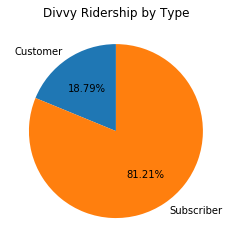

In [99]:
labels= ['Customer', 'Subscriber']

plt.pie(subscriber_to_plot,labels=labels, startangle=90, autopct='%.2f%%')
plt.title('Divvy Ridership by Type')
plt.show()

In [101]:
divvy_df

,ID,to_station_name
0,2,9062
1,3,23282
2,4,11544
3,5,8156
4,6,13515
...,...,...
616,660,200
617,661,25
618,662,46
619,663,68


In [127]:
divvy_combined

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,hour,month
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,0,1
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,0,1
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,NaN,98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,0,1
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,0,1
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642681,21742438,2018-12-31 23:45:17,2018-12-31 23:50:05,2931,288.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Female,1983.0,23,12
642682,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0,23,12
642683,21742440,2018-12-31 23:50:09,2018-12-31 23:57:16,4927,427.0,41,Federal St & Polk St,52,Michigan Ave & Lake St,Subscriber,Female,1995.0,23,12
642684,21742441,2018-12-31 23:55:04,2018-12-31 23:58:24,1350,200.0,141,Clark St & Lincoln Ave,118,Sedgwick St & North Ave,Subscriber,Male,1999.0,23,12


In [128]:
divvy_combined['tripduration'] = pd.to_numeric(divvy_combined['tripduration'], errors='coerce')

In [129]:
from_station = divvy_combined.groupby('tripduration').mean()
from_station

,trip_id,bikeid,from_station_id,to_station_id,birthyear,hour,month
tripduration,,,,,,,
61.0,1.949889e+07,3357.237154,199.553360,198.067194,1984.771300,14.193676,6.699605
62.0,1.961663e+07,3416.318777,199.742358,205.947598,1985.162437,13.882096,6.991266
63.0,1.961788e+07,3472.708502,177.886640,186.336032,1983.342466,14.441296,6.955466
64.0,1.956980e+07,3471.356522,201.621739,209.634783,1983.685990,13.730435,6.843478
65.0,1.948869e+07,3333.951923,209.793269,215.350962,1983.484375,14.197115,6.687500
...,...,...,...,...,...,...,...
995.0,1.966900e+07,3473.726073,182.685149,189.202640,1982.632862,14.130693,7.061386
996.0,1.965145e+07,3468.319293,186.370924,184.837636,1982.098039,13.660326,7.050272
997.0,1.964553e+07,3472.691307,194.336756,185.656400,1982.239382,13.686516,7.019849


In [130]:
from_station.dtypes

trip_id            float64
bikeid             float64
from_station_id    float64
to_station_id      float64
birthyear          float64
hour               float64
month              float64
dtype: object

In [131]:
birth_to_plot = birth_count[birth_count.columns[1:2]] 
birth_to_plot

,bikeid
age,
34.400000,1
34.457711,1
34.837563,1
34.888889,1
35.045704,1
...,...
38.285432,1
38.306631,1
38.313900,1


In [132]:
from_station['age'] = 2020 - from_station['birthyear']
from_station

,trip_id,bikeid,from_station_id,to_station_id,birthyear,hour,month,age
tripduration,,,,,,,,
61.0,1.949889e+07,3357.237154,199.553360,198.067194,1984.771300,14.193676,6.699605,35.228700
62.0,1.961663e+07,3416.318777,199.742358,205.947598,1985.162437,13.882096,6.991266,34.837563
63.0,1.961788e+07,3472.708502,177.886640,186.336032,1983.342466,14.441296,6.955466,36.657534
64.0,1.956980e+07,3471.356522,201.621739,209.634783,1983.685990,13.730435,6.843478,36.314010
65.0,1.948869e+07,3333.951923,209.793269,215.350962,1983.484375,14.197115,6.687500,36.515625
...,...,...,...,...,...,...,...,...
995.0,1.966900e+07,3473.726073,182.685149,189.202640,1982.632862,14.130693,7.061386,37.367138
996.0,1.965145e+07,3468.319293,186.370924,184.837636,1982.098039,13.660326,7.050272,37.901961
997.0,1.964553e+07,3472.691307,194.336756,185.656400,1982.239382,13.686516,7.019849,37.760618


In [133]:
bins = [0,10,20,30,40,50,60,70,80,90, 200]

# Create the names for the four bins
group_names = [ "under 9","19-10","29-20", "39-30", "49-40", "59-50", "69-60", "79-70", "89-80","OLD"]

pd.cut(['age'], bins, labels = group_names)

[NaN]
Categories (10, object): [under 9 < 19-10 < 29-20 < 39-30 ... 69-60 < 79-70 < 89-80 < OLD]

In [134]:
plt.bar(birth_to_plot['birthyear'], birth_to_plot['start_time'] ,alpha=0.75)
plt.title("Divvy Ridership by Hour of the day", fontsize=13)
plt.xlabel("Hour")
plt.ylabel("Rides")
plt.show

KeyError: 'birthyear'